In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()


57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
print("Train Datas Shape : {}".format(train_data.shape))
print("Train Labels Shape : {}".format(train_targets.shape))

Train Datas Shape : (404, 13)
Train Labels Shape : (404,)


In [3]:
display(train_data[0])
display(train_targets[0:10])

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

In [4]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std


In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers

def build_network(input_shape=(0,)):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=input_shape))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

In [6]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 150
all_scores = []
all_history = []
for i in range(k):
    print('폴드 번호 #{}'.format(i))
    fold_start_index = i * num_val_samples
    fold_end_index = (i + 1) * num_val_samples

    val_data = train_data[fold_start_index : fold_end_index]
    val_targets = train_targets[fold_start_index : fold_end_index]

    partial_train_data = np.concatenate(
        [train_data[:fold_start_index], train_data[fold_end_index:]],
        axis=0
    )

    partial_train_targets = np.concatenate(
        [train_targets[:fold_start_index], train_targets[fold_end_index:]],
        axis=0
    )

    model = build_network((partial_train_data.shape[1], ))
    history = model.fit(
        partial_train_data,
        partial_train_targets,
        epochs=num_epochs,
        validation_data=(val_data, val_targets),
        batch_size=1,
        verbose=0
    )
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mse)
    all_history.append(history.history)

폴드 번호 #0


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


폴드 번호 #1
폴드 번호 #2
폴드 번호 #3


In [39]:
val_mae_lst = [hist['val_mae'] for hist in all_history]
val_mae_lst = np.array(list(val_mae_lst))
avg_mae = [
    np.mean([x[i] for x in val_mae_lst]) for i in range(num_epochs)
]

In [40]:
val_mae_lst = [hist['val_loss'] for hist in all_history]
val_mae_lst = np.array(list(val_mae_lst))
avg_mae = [
    np.mean([x[i] for x in val_mae_lst]) for i in range(num_epochs)
]

In [11]:
import matplotlib.pyplot as plt
def smooth_curve(points, factor=.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [12]:
def show_graph(data):
    smooth_data = smooth_curve(data)
    plt.plot(range(1, len(smooth_data) + 1), smooth_data)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()

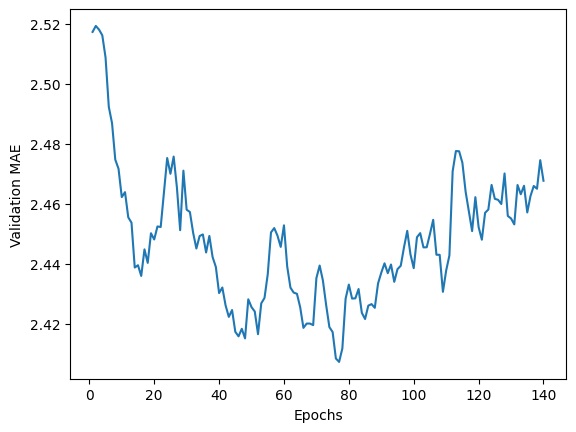

In [37]:
show_graph(avg_mae[10:])

키 설정


In [21]:
# all_history 내 각 요소의 키를 확인
for i, hist in enumerate(all_history):
    print(f"Fold {i} history keys:", hist.keys())


Fold 0 history keys: dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
Fold 1 history keys: dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
Fold 2 history keys: dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
Fold 3 history keys: dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


In [22]:
for i, hist in enumerate(all_history):
    print(f"Fold {i} keys: {list(hist.keys())}")


Fold 0 keys: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 1 keys: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 2 keys: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 3 keys: ['loss', 'mae', 'val_loss', 'val_mae']


In [23]:
val_mae_lst = [
    hist['val_mae'] for hist in all_history if 'val_mae' in hist
]


In [24]:
for i, hist in enumerate(all_history):
    print(f"Fold {i} history:", hist)


Fold 0 history: {'loss': [219.17979431152344, 26.248050689697266, 19.601879119873047, 15.834965705871582, 14.40241813659668, 13.031210899353027, 13.013917922973633, 12.13065242767334, 11.264562606811523, 10.94727897644043, 10.768606185913086, 9.996673583984375, 10.24542236328125, 9.70141315460205, 9.284697532653809, 8.827516555786133, 8.63235855102539, 8.663344383239746, 8.189258575439453, 8.157590866088867, 7.660116195678711, 7.965345859527588, 7.372934818267822, 7.249536037445068, 7.230571269989014, 6.722349643707275, 7.423863410949707, 7.280123710632324, 6.473167419433594, 6.474806785583496, 6.066049575805664, 6.772369861602783, 6.3964762687683105, 5.989958763122559, 6.042914867401123, 5.0705060958862305, 5.910528659820557, 5.692984104156494, 5.182265281677246, 5.824638366699219, 5.385228633880615, 5.109734535217285, 5.161222457885742, 4.8485188484191895, 4.813932418823242, 4.669284820556641, 4.431445598602295, 4.731428623199463, 4.353144645690918, 4.614144325256348, 4.3175010681152

In [26]:
# 각 폴드의 history에서 키 확인
for i, hist in enumerate(all_history):
    print(f"Fold {i} history keys: {list(hist.keys())}")


Fold 0 history keys: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 1 history keys: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 2 history keys: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 3 history keys: ['loss', 'mae', 'val_loss', 'val_mae']


In [27]:
# val_mae_lst 추출
val_mae_lst = [
    hist['val_mae'] for hist in all_history if 'val_mae' in hist
]

# numpy 배열로 변환
val_mae_lst = np.array(val_mae_lst)

# 에포크별 평균 MAE 계산
avg_mae = [
    np.mean(val_mae_lst[:, i]) for i in range(val_mae_lst.shape[1])
]

print("에포크별 평균 MAE:", avg_mae)


에포크별 평균 MAE: [4.0135802030563354, 3.100005567073822, 2.9052188992500305, 2.6423060297966003, 2.566911280155182, 2.6696296334266663, 2.5921342372894287, 2.569424092769623, 2.6253899931907654, 2.512034237384796, 2.5173664689064026, 2.5373750925064087, 2.506941556930542, 2.4990352392196655, 2.4424787163734436, 2.3443562388420105, 2.43776136636734, 2.365273892879486, 2.4444849491119385, 2.3771792352199554, 2.4787421822547913, 2.3800160586833954, 2.437565565109253, 2.3042831420898438, 2.4463759660720825, 2.4039090871810913, 2.524648368358612, 2.3996835947036743, 2.5392311215400696, 2.4294925332069397, 2.4915229082107544, 2.450598359107971, 2.5683019161224365, 2.5779415369033813, 2.422812819480896, 2.5273962020874023, 2.3726751804351807, 2.323117256164551, 2.649788558483124, 2.3408427834510803, 2.4505210518836975, 2.388021767139435, 2.3977981209754944, 2.48685085773468, 2.454626500606537, 2.3895050287246704, 2.499098300933838, 2.3788756132125854, 2.4093350768089294, 2.351828873157501, 2.4488

In [28]:
for i, hist in enumerate(all_history):
    print(f"Fold {i} history data:", hist)


Fold 0 history data: {'loss': [219.17979431152344, 26.248050689697266, 19.601879119873047, 15.834965705871582, 14.40241813659668, 13.031210899353027, 13.013917922973633, 12.13065242767334, 11.264562606811523, 10.94727897644043, 10.768606185913086, 9.996673583984375, 10.24542236328125, 9.70141315460205, 9.284697532653809, 8.827516555786133, 8.63235855102539, 8.663344383239746, 8.189258575439453, 8.157590866088867, 7.660116195678711, 7.965345859527588, 7.372934818267822, 7.249536037445068, 7.230571269989014, 6.722349643707275, 7.423863410949707, 7.280123710632324, 6.473167419433594, 6.474806785583496, 6.066049575805664, 6.772369861602783, 6.3964762687683105, 5.989958763122559, 6.042914867401123, 5.0705060958862305, 5.910528659820557, 5.692984104156494, 5.182265281677246, 5.824638366699219, 5.385228633880615, 5.109734535217285, 5.161222457885742, 4.8485188484191895, 4.813932418823242, 4.669284820556641, 4.431445598602295, 4.731428623199463, 4.353144645690918, 4.614144325256348, 4.31750106

In [29]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mean_absolute_error']  # 또는 ['mae']
)


In [31]:
# 모든 폴드의 history 데이터 확인
for i, hist in enumerate(all_history):
    print(f"Fold {i} history:")
    for key, value in hist.items():
        print(f"  {key}: {value[:5]}...")  # 처음 5개의 값만 출력


Fold 0 history:
  loss: [219.17979431152344, 26.248050689697266, 19.601879119873047, 15.834965705871582, 14.40241813659668]...
  mae: [10.946484565734863, 3.4810774326324463, 3.061713457107544, 2.762134552001953, 2.731403350830078]...
  val_loss: [33.483360290527344, 20.605026245117188, 15.263555526733398, 12.302225112915039, 10.801761627197266]...
  val_mae: [3.673821210861206, 2.9682717323303223, 2.5898232460021973, 2.253821611404419, 2.24847674369812]...
Fold 1 history:
  loss: [189.62254333496094, 24.21395492553711, 16.55881690979004, 14.127354621887207, 12.400456428527832]...
  mae: [9.989703178405762, 3.3520376682281494, 2.737988233566284, 2.5080156326293945, 2.4041991233825684]...
  val_loss: [26.550203323364258, 17.749794006347656, 18.116125106811523, 13.838176727294922, 12.884018898010254]...
  val_mae: [3.9250543117523193, 3.1056294441223145, 3.3321614265441895, 2.8004298210144043, 2.7314181327819824]...
Fold 2 history:
  loss: [208.77406311035156, 26.630983352661133, 16.8514

In [32]:
val_mae_lst = [
    hist['val_mae'] for hist in all_history if 'val_mae' in hist
]


In [33]:
val_mae_lst = []
for hist in all_history:
    if 'val_mean_absolute_error' in hist:
        val_mae_lst.append(hist['val_mean_absolute_error'])
    elif 'val_mae' in hist:  # 다른 대체 키 확인
        val_mae_lst.append(hist['val_mae'])
    else:
        print("경고: 이 history에 'val_mean_absolute_error' 또는 'val_mae'가 없습니다.", hist.keys())


In [34]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mean_absolute_error']  # 또는 'mae'
)


In [35]:
# 모든 history 데이터에서 문제가 있는 항목 확인
for i, hist in enumerate(all_history):
    if not isinstance(hist, dict):
        print(f"Fold {i} 데이터가 잘못되었습니다: {hist}")
    elif 'val_mean_absolute_error' not in hist:
        print(f"Fold {i}에서 'val_mean_absolute_error' 키가 없습니다. 키들: {list(hist.keys())}")


Fold 0에서 'val_mean_absolute_error' 키가 없습니다. 키들: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 1에서 'val_mean_absolute_error' 키가 없습니다. 키들: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 2에서 'val_mean_absolute_error' 키가 없습니다. 키들: ['loss', 'mae', 'val_loss', 'val_mae']
Fold 3에서 'val_mean_absolute_error' 키가 없습니다. 키들: ['loss', 'mae', 'val_loss', 'val_mae']


In [36]:
# val_mae_lst를 numpy 배열로 변환
val_mae_lst = np.array(val_mae_lst)

# 에포크별 평균 MAE 계산
avg_mae = [
    np.mean(val_mae_lst[:, i]) for i in range(val_mae_lst.shape[1])
]

print("에포크별 평균 MAE:", avg_mae)


에포크별 평균 MAE: [4.0135802030563354, 3.100005567073822, 2.9052188992500305, 2.6423060297966003, 2.566911280155182, 2.6696296334266663, 2.5921342372894287, 2.569424092769623, 2.6253899931907654, 2.512034237384796, 2.5173664689064026, 2.5373750925064087, 2.506941556930542, 2.4990352392196655, 2.4424787163734436, 2.3443562388420105, 2.43776136636734, 2.365273892879486, 2.4444849491119385, 2.3771792352199554, 2.4787421822547913, 2.3800160586833954, 2.437565565109253, 2.3042831420898438, 2.4463759660720825, 2.4039090871810913, 2.524648368358612, 2.3996835947036743, 2.5392311215400696, 2.4294925332069397, 2.4915229082107544, 2.450598359107971, 2.5683019161224365, 2.5779415369033813, 2.422812819480896, 2.5273962020874023, 2.3726751804351807, 2.323117256164551, 2.649788558483124, 2.3408427834510803, 2.4505210518836975, 2.388021767139435, 2.3977981209754944, 2.48685085773468, 2.454626500606537, 2.3895050287246704, 2.499098300933838, 2.3788756132125854, 2.4093350768089294, 2.351828873157501, 2.4488